### Pytorch를 이용한 키(height) -> 몸무게(weight) 선형 회귀 학습
* 키(height)를 바탕으로 몸무게를 예측할 수 있도록 선형 회귀 코드를 작성하였다.
* 국민건강보험 2022년 건강검진 데이터를 사용하였다.

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import matplotlib.pyplot as plt #시각화
import numpy as np

In [2]:
# CSV 파일 불러오기
file_path = "health_data_korea.CSV"  # 파일 경로 (CSV 파일이 있는 위치로 변경)
df = pd.read_csv(file_path)

# 필요한 열만 선택 (키, 몸무게 데이터를 300쌍 가져온다.)
df_filtered = df[['Height (5cm Intervals)', 'Weight (5kg Intervals)']].dropna().iloc[:300]
df_filtered.rename(columns={'Height (5cm Intervals)': 'Height', 'Weight (5kg Intervals)': 'Weight'}, inplace=True)

In [3]:
print(df_filtered.describe()) #데이터 확인

           Height      Weight
count  300.000000  300.000000
mean   160.183333   62.683333
std      9.110051   11.938375
min    135.000000   40.000000
25%    155.000000   55.000000
50%    160.000000   60.000000
75%    170.000000   70.000000
max    180.000000  110.000000


In [4]:
# PyTorch 텐서로 변환
x_train = torch.tensor(df_filtered["Height"].values, dtype=torch.float32).reshape(-1, 1)  # 입력: 키
y_train = torch.tensor(df_filtered["Weight"].values, dtype=torch.float32).reshape(-1, 1)  # 출력: 몸무게

# 데이터 정규화 (표준화)
x_mean, x_std = x_train.mean(), x_train.std()
y_mean, y_std = y_train.mean(), y_train.std()

x_train = (x_train - x_mean) / x_std  # 평균 0, 표준편차 1
y_train = (y_train - y_mean) / y_std

In [5]:
# 선형 회귀 모델 정의
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)  # 입력 1개(키) → 출력 1개(몸무게)

    def forward(self, x):
        return self.linear(x)

model = LinearRegressionModel()

# 손실 함수와 옵티마이저 정의
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)  # 학습률 조정

c:\Users\dana\anaconda3\envs\musicgen2\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
# 학습 루프 실행
num_epochs = 500
loss_values = []  # 손실값 저장용 리스트
for epoch in range(num_epochs):
    y_pred = model(x_train)  # 모델 예측
    loss = criterion(y_pred, y_train)  # 손실 계산
    loss_values.append(loss.item())  # 손실 저장
    
    optimizer.zero_grad()  # 기울기 초기화
    loss.backward()  # 역전파
    optimizer.step()  # 가중치 업데이트
    
    if (epoch+1) % 50 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [50/500], Loss: 0.7244
Epoch [100/500], Loss: 0.6128
Epoch [150/500], Loss: 0.5979
Epoch [200/500], Loss: 0.5960
Epoch [250/500], Loss: 0.5957
Epoch [300/500], Loss: 0.5957
Epoch [350/500], Loss: 0.5956
Epoch [400/500], Loss: 0.5956
Epoch [450/500], Loss: 0.5956
Epoch [500/500], Loss: 0.5956


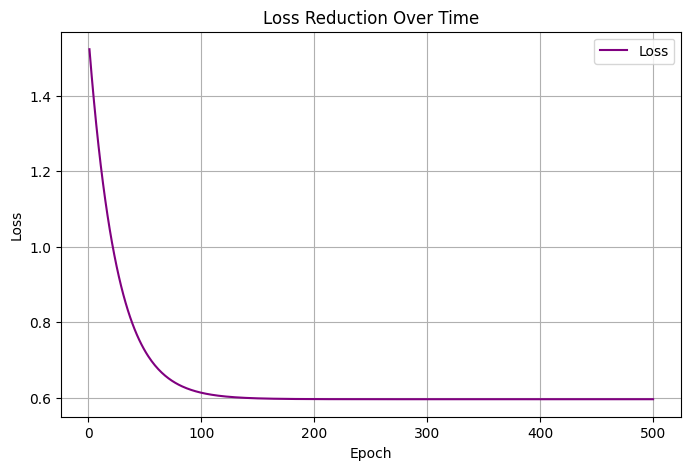

In [7]:
# 🔹 1. 손실 값(Loss) 시각화
plt.figure(figsize=(8, 5))
plt.plot(range(1, num_epochs + 1), loss_values, label="Loss", color="purple")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Reduction Over Time")
plt.legend()
plt.grid(True)
plt.show()

In [8]:
# 🔹 2. 실제 vs 예측값 비교 그래프
heights = df_filtered["Height"].values
weights = df_filtered["Weight"].values

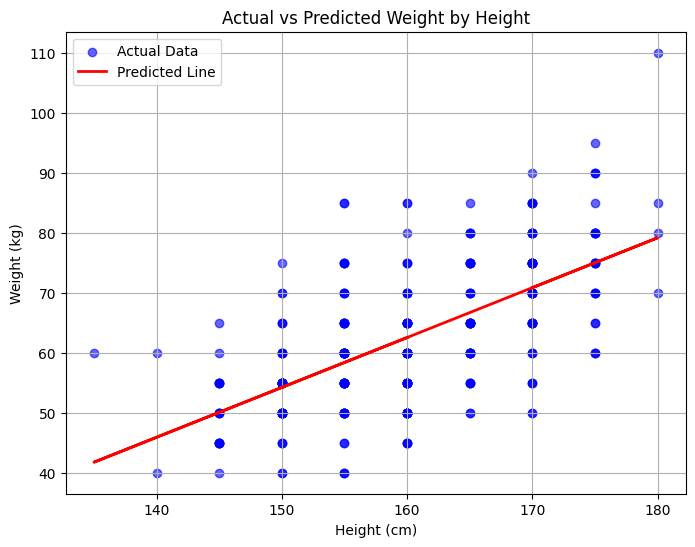

In [9]:
# 모델 예측값 계산
x_tensor = torch.tensor(heights, dtype=torch.float32).reshape(-1, 1)
x_tensor_norm = (x_tensor - x_mean) / x_std  # 정규화 적용
y_pred_tensor = model(x_tensor_norm)  # 모델 예측
y_pred = (y_pred_tensor * y_std + y_mean).detach().numpy()  # 역정규화

# 실제 데이터 vs. 예측된 데이터 시각화
plt.figure(figsize=(8, 6))
plt.scatter(heights, weights, label="Actual Data", color="blue", alpha=0.6)  # 실제 데이터 산점도
plt.plot(heights, y_pred, label="Predicted Line", color="red", linewidth=2)  # 예측 선형 회귀 직선

plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.title("Actual vs Predicted Weight by Height")
plt.legend()
plt.grid(True)
plt.show()

In [13]:
# 8️⃣ 학습된 모델로 예측 수행 (예: 키 175cm일 때 몸무게 예측)
x_test = torch.tensor([[165.0]], dtype=torch.float32)
x_test = (x_test - x_mean) / x_std  # 입력 데이터 정규화

y_test_pred = model(x_test)
y_test_pred = y_test_pred * y_std + y_mean  # 역정규화 (원래 단위로 변환)

# 결과 출력
print(f"키 165cm의 예상 몸무게: {y_test_pred.item():.2f}kg")

키 165cm의 예상 몸무게: 66.69kg
